In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**NOTE**:Spirals code is taken from the website
https://gist.github.com/45deg/e731d9e7f478de134def5668324c44c5

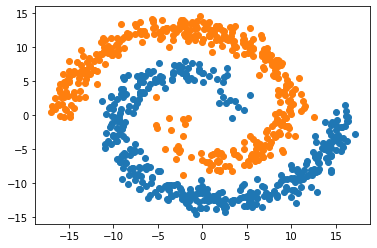

In [ ]:
import numpy as np
from numpy import pi
# import matplotlib.pyplot as plt

N = 400
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

A model capable of distinguishing blue from orange should be created. Thats the task..

In [ ]:
spiral_df = pd.read_csv("result.csv")

spiral_df.head()

,x,y,label
0,5.60545,-5.70009,1.0
1,-1.80578,6.02087,0.0
2,-8.89873,3.79699,0.0
3,1.13585,9.33077,1.0
4,9.57073,-9.30952,0.0


In [ ]:
X = spiral_df[['x','y']]
y = spiral_df['label']

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
795    0.0
796    0.0
797    1.0
798    1.0
799    1.0
Name: label, Length: 800, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

Xtr, Xte, Ytr, Yte = train_test_split(X, y)

In [ ]:
spiral_df.label.value_counts()

0.0    400
1.0    400
Name: label, dtype: int64

In [ ]:
print(Xtr.shape)
print(Ytr.shape)

(600, 2)
(600,)


In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [ ]:
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])


model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])


model_1.fit(X, y, epochs=5)

Epoch 1/5
25/25 [==============================] - 0s 1ms/step - loss: 7.6547 - accuracy: 0.4775
Epoch 2/5
25/25 [==============================] - 0s 1ms/step - loss: 7.2444 - accuracy: 0.5013
Epoch 3/5
25/25 [==============================] - 0s 1ms/step - loss: 5.0808 - accuracy: 0.6438
Epoch 4/5
25/25 [==============================] - 0s 2ms/step - loss: 3.7969 - accuracy: 0.7212
Epoch 5/5
25/25 [==============================] - 0s 2ms/step - loss: 3.8681 - accuracy: 0.7287


Woww!! What the hell 72% accuracy already?
But if we see below, the model is pretty freaked up. We have to introduce something which makes this b*tch cuurvy ( yes! with two 'u's ) 


doing binary classifcation...


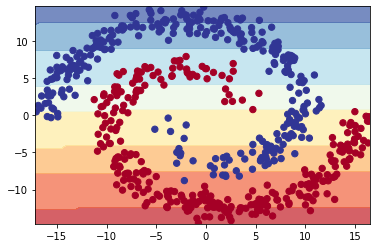

In [ ]:
plot_decision_boundary(model_1, Xtr.to_numpy(), Ytr.to_numpy())

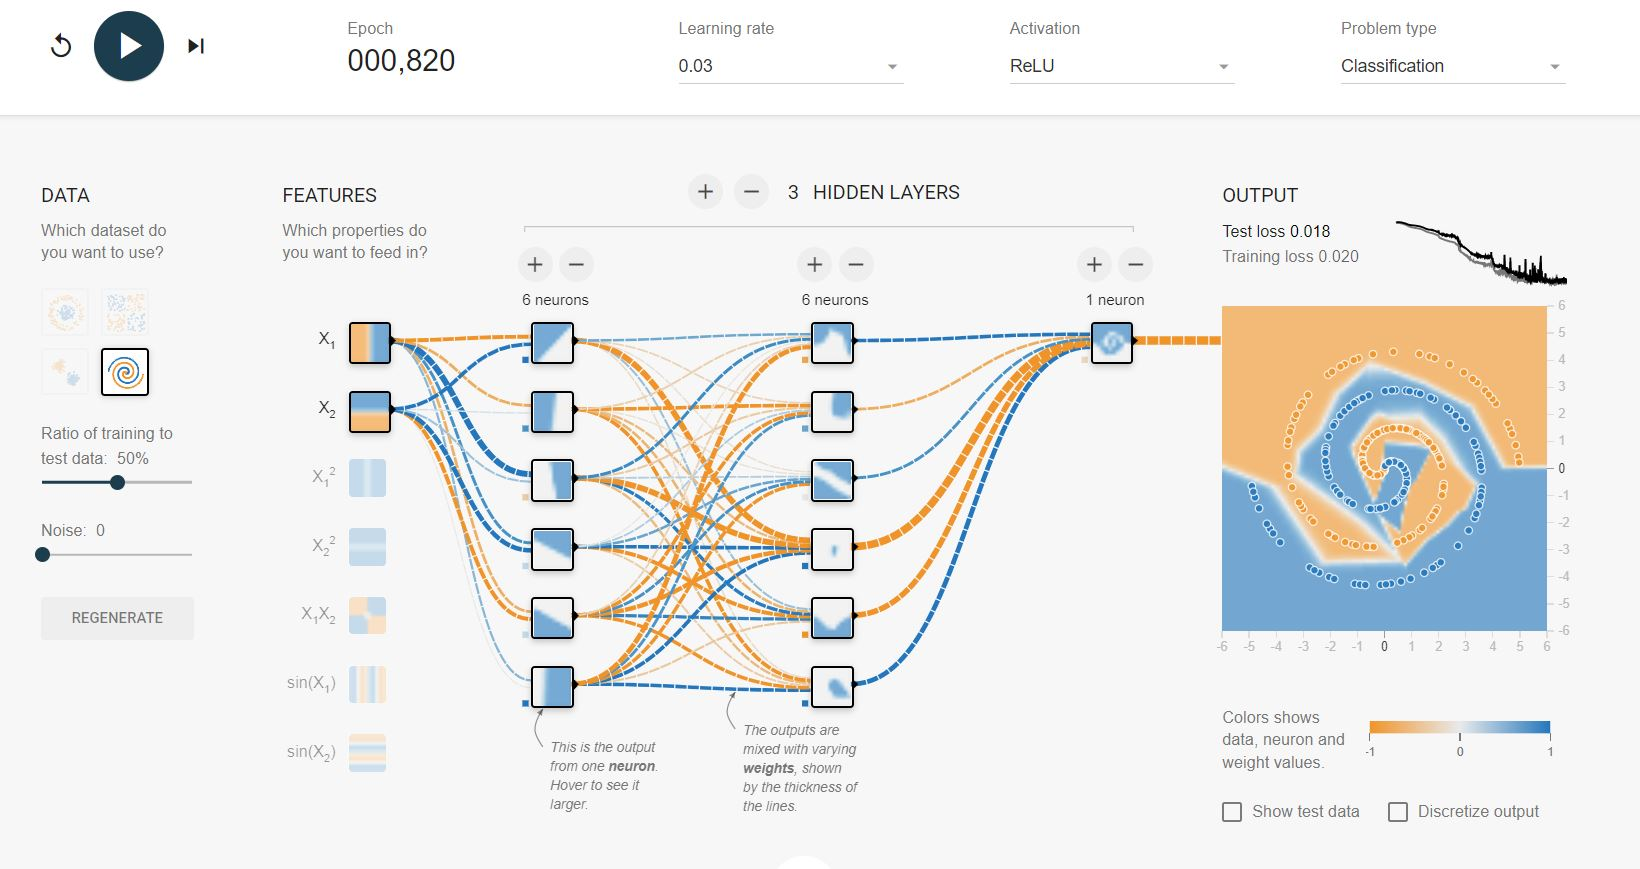

This website named [playground.tensorflow.org](https://) helped me. Thanks Jesus!

In [ ]:
tf.random.set_seed(41)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


hist = model_2.fit(Xtr, Ytr, epochs=500)

Epoch 1/500
19/19 [==============================] - 1s 2ms/step - loss: 0.9250 - accuracy: 0.6217
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.8109 - accuracy: 0.6617
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.7311 - accuracy: 0.6400
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.6283
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6317
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6433
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.6450
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.6533
Epoch 9/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5593 - accuracy: 0.6600
Epoch 10/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5480 - accuracy: 0.6617
Epoch 11/

doing binary classifcation...


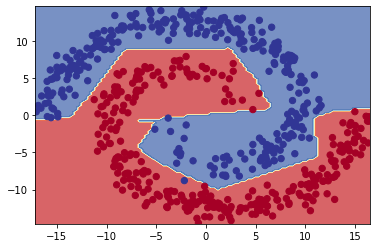

In [ ]:
plot_decision_boundary(model_2, Xtr.to_numpy(), Ytr.to_numpy())

In [ ]:
model_2.evaluate(Xte, Yte)

7/7 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9800


[0.1414676308631897, 0.9800000190734863]

doing binary classifcation...


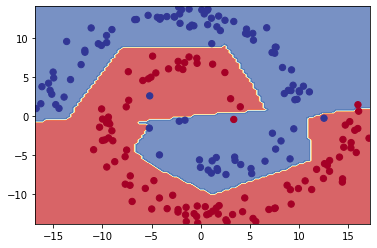

In [ ]:
plot_decision_boundary(model_2, Xte.to_numpy(), Yte.to_numpy())

Text(0.5, 1.0, 'Training curves')

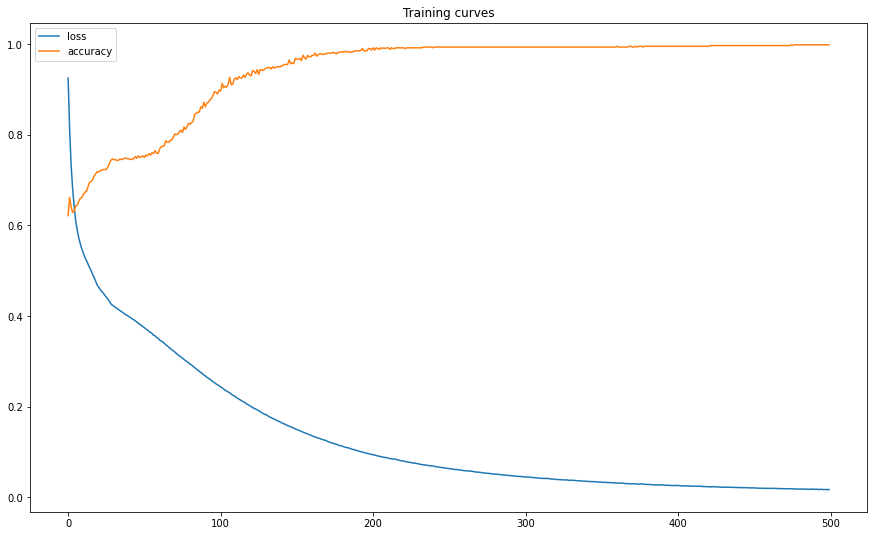

In [ ]:
pd.DataFrame(hist.history).plot(figsize=(15,9))
plt.title("Training curves")


Quite honestly the above is one of the best pieces of accuracy I have ever seen.

Now lets try MNIST dataset

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(Xtr1, Ytrl), (Xte1, Yte1) = fashion_mnist.load_data()


Sandal


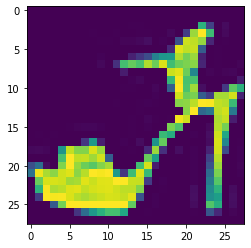

In [ ]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(Xtr1[9])
print(class_names[Ytrl[9]])

In [ ]:
# Xtr1 = Xtr1/255
# Ytrl = Ytrl/255
# (Xtr1.min(),Xtr1.max())

In [ ]:
import tensorflow as tf

tf.random.set_seed(41)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(17, activation="relu"),
  tf.keras.layers.Dense(13, activation="relu"),
  tf.keras.layers.Dense(11, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile( loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


mnist_hist = model_4.fit(Xtr1, Ytrl, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7584 - accuracy: 0.4437
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0146 - accuracy: 0.6119
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6864 - accuracy: 0.7338
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6143 - accuracy: 0.7650
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5739 - accuracy: 0.7828
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5389 - accuracy: 0.7990
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5110 - accuracy: 0.8152
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4967 - accuracy: 0.8248
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4796 - accuracy: 0.8316
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.474

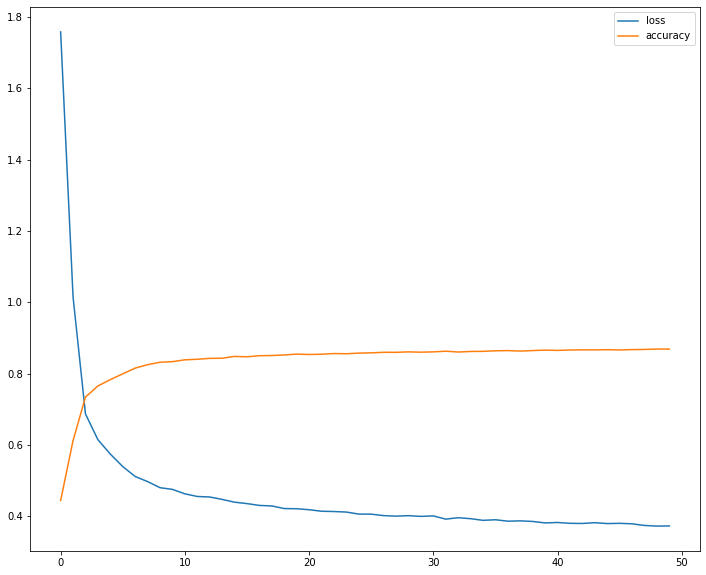

In [ ]:
import pandas as pd

pd.DataFrame(mnist_hist.history).plot(figsize=(12,10))

In [ ]:
model_4.evaluate(Xte1,Yte1)

313/313 [==============================] - 1s 2ms/step - loss: 0.5026 - accuracy: 0.8385


[0.502632737159729, 0.8385000228881836]

* Tried this BS for a day and the model wouldnt give me more juice. 

* That is the very reason one would opt the legendary `convolutional neural network`

In [ ]:
print("Soya beans")

Soya beans
